
Model Accuracy: 0.93

Classification Report:
               precision    recall  f1-score   support

    Negative       0.93      0.95      0.94       273
    Positive       0.93      0.90      0.91       189

    accuracy                           0.93       462
   macro avg       0.93      0.93      0.93       462
weighted avg       0.93      0.93      0.93       462


Confusion Matrix (True vs Predicted Sentiments):
 [[260  13]
 [ 19 170]]


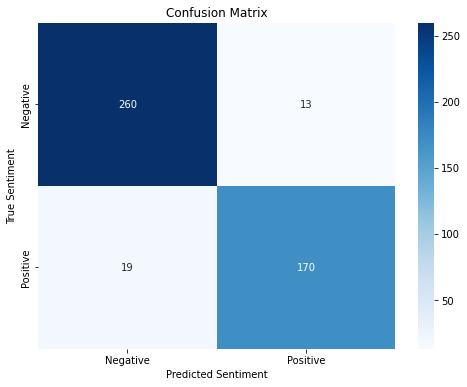


Interpreting the Confusion Matrix:
- True Negatives (TN): 260 - Correctly predicted Negative reviews.
- False Positives (FP): 13 - Incorrectly predicted Positive reviews for actual Negative reviews.
- False Negatives (FN): 19 - Incorrectly predicted Negative reviews for actual Positive reviews.
- True Positives (TP): 170 - Correctly predicted Positive reviews.

The model performed very well with an accuracy above 80%.


In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv("./Emirates Airways Reviews.csv")  # Load the CSV file into a DataFrame

# Step 2: Preprocessing the data
# Drop rows with missing 'Overall Rating' since it's essential for our target variable
df = df.dropna(subset=['Overall Rating'])  # Drop rows where the 'Overall Rating' column has missing values

# Convert 'Overall Rating' to 'Positive' or 'Negative' based on rating scale
# If the rating is greater than 5, the sentiment is 'Positive', else it's 'Negative'
df['Sentiment'] = df['Overall Rating'].apply(lambda x: 'Positive' if x > 5 else 'Negative')

# Step 3: Extracting features and target
# Extract the features (X) and target variable (y) for classification
X = df[['Travel Class', 'Route', 'Date Flown', 'Seating Comfort', 'Staff Service', 
        'Food Quality', 'Entertainment', 'WiFi', 'Ground Service', 
        'Value for Money', 'Recommended']]  # Selecting the features for prediction
y = df['Sentiment']  # The target variable is the 'Sentiment' column

# Step 4: Splitting the data into training and testing sets
# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Preprocessing
# Define the preprocessor with transformations for categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        # Transform numerical features by imputing missing values with the mean and scaling them
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
            ('scaler', StandardScaler())  # Standardize the numerical features
        ]), ['Seating Comfort', 'Staff Service', 'Food Quality', 'Entertainment', 
             'WiFi', 'Ground Service', 'Value for Money']),  # List of numerical columns
        
        # Transform categorical features by imputing missing values with the most frequent value and one-hot encoding
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values with most frequent
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # OneHotEncode categorical features
        ]), ['Travel Class', 'Route', 'Recommended'])  # List of categorical columns
    ])

# Step 6: Model pipeline (combining preprocessing and classification)
# The pipeline combines preprocessing and model training into one step
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Add the preprocessing step
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Use RandomForestClassifier for classification
])

# Step 7: Train the model
# Fit the model using the training data
pipeline.fit(X_train, y_train)

# Step 8: Make predictions
# Use the trained model to make predictions on the test data
y_pred = pipeline.predict(X_test)

# Step 9: Evaluate the model
# Calculate and print the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")  # Print accuracy to two decimal places

# Print the classification report for detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))  # Precision, recall, F1-score for each class

# Generate and print the confusion matrix to evaluate performance
cm = confusion_matrix(y_test, y_pred)  # Confusion matrix: true vs predicted values
print("\nConfusion Matrix (True vs Predicted Sentiments):\n", cm)

# Step 10: Visualize the Confusion Matrix
# Plotting the confusion matrix using a heatmap for better visualization
plt.figure(figsize=(8,6))  # Set the size of the plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Sentiment')  # Label for the x-axis
plt.ylabel('True Sentiment')  # Label for the y-axis
plt.title('Confusion Matrix')  # Title of the plot
plt.show()  # Display the plot

# Step 11: Interpretation of Results
# Extract the individual values from the confusion matrix
tn, fp, fn, tp = cm.ravel()  # ravel() unpacks the confusion matrix into its individual components

# Print out the interpretation of the confusion matrix
print("\nInterpreting the Confusion Matrix:")
print(f"- True Negatives (TN): {tn} - Correctly predicted Negative reviews.")  # Correctly predicted negative reviews
print(f"- False Positives (FP): {fp} - Incorrectly predicted Positive reviews for actual Negative reviews.")  # Incorrectly predicted positive reviews
print(f"- False Negatives (FN): {fn} - Incorrectly predicted Negative reviews for actual Positive reviews.")  # Incorrectly predicted negative reviews
print(f"- True Positives (TP): {tp} - Correctly predicted Positive reviews.")  # Correctly predicted positive reviews

# Step 12: Optional performance feedback
# Based on the accuracy, print feedback on the model's performance
if accuracy > 0.8:
    print("\nThe model performed very well with an accuracy above 80%.")
elif accuracy > 0.7:
    print("\nThe model performed reasonably well with an accuracy above 70%.")
else:
    print("\nThe model's accuracy is below 70%, which suggests that there might be room for improvement.")